# Project 3: Monte Carlo Simulations
## Phase 3

In [1]:
#boilerplate
import numpy as np
import scipy.stats as stat
import matplotlib.pyplot as plt
atoms = np.genfromtxt('atom_data.txt',comments = '#',delimiter = ',')
%matplotlib inline
from scipy.stats import maxwell
# Globally fix plot styling
import matplotlib as mpl
mpl.rc('xtick', direction='in', top=True)
mpl.rc('ytick', direction='in', right=True)
mpl.rc('xtick.minor', visible=True)
mpl.rc('ytick.minor', visible=True)
import scipy.optimize as opt

Monte Carlo methods are really useful for a lot of different physics problems! They have been used since the 1940s to estimate numerical answers to questions that cannot be solved analytically. They were made popular because computing allows many more computations to be completed than humans would otherwise be able to do. Monte Carlo methods incorporate events with some uncertainty using repeated random sampling. Monte Carlo methods sample from a probability distribution for each variable to produce hundreds, thousands or even millions of possible outcomes. However, for a generalized system, variables may be coupled, meaning that the value of one variable may be dependent on the value of a different variable, which also influences the outcome. For example, when you are modeling profits for a given business in different markets, you may sell more or fewer units of a good depending on how “hot” or “cold” the market is, but the number of units you sell may also influence the price point of the goods (as a result of competition or other factors), which therefore affects the net profits of the business. Such is the essence of Monte Carlo methods; if you aren’t sure of the value of the variables you are modeling, how could possibly predict the outcome? In order to properly predict the total profits of your toy company, you’ll have to run many trial simulations in different market environments.

## Our system: Thermionic Emission Lamps
Our humble clown now would like to purchase some lamps to advertise his upcoming circus show. He has found a great deal on thermionic emission lamps, but needs a specific color palate to showcase the event. What combination of parameters (concentrations of elements, temperature, tube length, etc.) should the clown use to get the proper colors he needs? Since we are using thermionic emission lamps, now seems like an appropriate time to introduce a very famous Nobel Prize-winning experiment that used thermionic emission currents to show discretized energy levels in atoms: the Franck-Hertz experiment.

To understand the phenomena of thermionic emission one must imagine a metal in which electrons 'boiled off' of the metal when it is raised to a sufficiently high temperature. This process can be modeled from the jellium model for the free electrons, in which the electrons in the metal are free to move while the positive atomic cores are assumed to be stationary and provide a uniform potential that keeps the free electrons within the metal. Within the potential energy of a free electron within the metal is then given as some value $E_m$ that is around 5-15 eV, and is 0 outside of the metal. Which means there is a large potential barrier at the surface of the metal which must be overcome if an electron is to escape. The mean energy that a free electron possesses is the thermal energy, and if the metal is at a temperature T the energy is given as, $U_T = k_b T.$ At room temperatures $U_T << E_s,$ so in one dimension the free electrons are at the bottom of a potential well. The probability of electron an leaving the metal at a temperature $T$ is proportional to the Boltzmann coefficient $e^{\frac{-E_s}{k_b T}},$ and at room temperature this value is much less than 1, meaning that there is low chance of an electrron escape. What allows this to happen at even higher temperatures is the Pauli Exclusion Principle. This states that only one fermion, such as an electron, can occupy a given quantum state. At $T=0$, the lowest energy state a fermion can occupy is the Fermi energy, $E_f,$ and for metals there are around $10^{20}$ electrons, which means $E_f >> U_T .$ This means the actual probability of an electron being able to leave the metal is given as, $e^{\frac{-(E_s - E_f)}{k_b T}}.$ At $T < E_{f}/k_b,$ which is well above room temperature this means the probability is still low but the energy needed for an electron to escape is no longer $E_s$, instead it's $E_s - E_f,$ which for metals at room temperature isn't much more than 5 eV, which is a much more accessible energy level. Therefore, the escape probability is usually written as, $e^{\frac{-\phi}{k_b T}},$ where $\phi \equiv E_s - E_f$ is called the work function. So to relate the work function to the current from the free electrons being ejected from a cathode made of metal with work function $\phi$ requires considering the probability in which the metal is in three dimensions, and from an atomic physics textbook is given as the Dushman-Richardson equation,
$$i = A T^2 e^{\frac{-\phi}{k_b T}}.$$
Where $A$ is a material constant. The current $i$ is called the thermionic emission current density and is in units of current per unit surface area.
However, this behavior cannot be seen with by just heating up the metal, as previously mentioned as soon as the electrons are ejected the kinetic energy of the electron is only $K_E \approx U_T,$ and is shown in said textbook. So this means that the these ejected electrons cannot travel far from the cathode and will form a negatively charged cloud of electrons near the cathode. The thermionic current when this happens is called space charged limited, as it keeps more electrons from being able to leave the cathode. This behavior can be modeled by the Langmuir formula,
$$i = (2.3*10^{-6}) \frac{V^{2/3}}{d^{-2}}.$$
where $i$ is still the thermionic emission current but in units of Amps per $cm^2$, from two plate electrodes a distance $d$ cm apart and a potential V.  To overcome this behavior in an electron tube a potential must be applied to the anode in order to get the electrons flowing from the cathode to the anode. Once a high enough anode potential has been applied the electrons flow directly to the anode and this behavior is called the saturation region. Because we want electrons to cross the tube we shall not be considering the regime in the Langmuir formula.

Here is a link that give the derivation for these equations as well. http://mafija.fmf.uni-lj.si/seminar/files/2007_2008/Thermionic_emission.pdf

### Franck-Hertz Experiment Background
The Franck-Hertz experiment is a landmark achievement of quantum mechanics because when it was conducted in 1914 by James Franck and Gustav Hertz, it was the first experiment to effectively show the existence of quantized energy levels in atoms. They did this by using the behavior of thermionic emission, explained above, in an electron tube with mercury gas in the tube. 

So what happens if the tube has some gas in it? If these electrons were to bump into these atoms in the gas, the behavior is dependent on the electron energy. If the electron doesn't have very much energy than it would just elastically scatter off of the much larger gas atom. However if the kinetic energy of the electron is comparable to the excitation energy of the atom, like ~19 eV for a neon atom for example, the electron will inelastically scatter and transfer its energy to excite the atom. This is due to the quantized nature of energy levels. Once an atom is excited it will relax back into is ground state and emit a photon. For the atoms that we are planning on working with we want the photon to be in the visible range. We also do not want to consider atoms that would absorb the electron, as that system is too complex for us to model. From these constraints, noble gases are our prime choice, since they are non-interacting atoms that display these behaviors.

The energy of the electrons moving through the tube is proportional to the potential difference they cross, and when Franck-Hertz ramped their tube full of gas through different voltages, they found that the resulting current oscillated with strictly increasing voltage, showing the quantum nature of atomic energy states. This is not the exact phenomenon we want to look at, but it is a good basis for the system we want to consider. The collisions of the electrons with the gas are not wholly dependent on the kinetic energy of the electrons but also dependent on the velocity of the gas. This gas follows a distribution of velocities that are evenly distributed and affect the resulting energy of the collision. Because of this, the bands of gas will glow in diffuse bands where the thickness of these bands is related to the distribution of velocities and therefore the temperature of the gas itself. The higher the temperature, the greater the distribution of velocities and therefore the greater the bandwidth.
These atoms follow the Maxwell-Boltzmann distribution 
$$ \exp(-\frac{E}{k_B T})d^3 \nu = \exp(-\frac{m\nu^2}{2 k_B T})\nu^2 d\nu  d\Omega$$
Where $\nu$ is the magnitude of the 3D velocity, and $d\Omega$ is the 3D volume element. We can integrate this over solid angle to get the distribution of particle speeds. 
$$f(v)dv= (\frac{m}{2\pi k_BT})^{\frac{3}{2}}4\pi v^2 e^{\frac{-mv^2}{2k_BT}}dv$$.
This gives us a one dimensional distribution over which we can pick speeds to calculate collision energy.


We can fill this distribution for the proper temperature with random values to model the atomic movements throughout the entire tube. By combining this with the distribution of electron velocities from the cathode along the entirety of the tube we can use Monte Carlo techniques to calculate collision energy and then find where potons are emitted in the tube. 

**new addition** We realize that when we put gas in a tube, it will have some pressure, which affects the stability of the system in how the gas atoms move with respect to one another, but we prefer to treat the gases in our system as ideal because then we can neglect the effects of gas atoms with respect to one another, as well as the space they take up in the tube.

**new addition** Although we realize that in practice, electrons will be moving down the tube concurrently with one another, we simulate only one electron at a time and then replicate it as many times as we can to capture the essence of electron propagation through the tube. Therefore, our setup does not encode interactions between electrons, but we believe we are able to do this because electrons moving with respect to one another might only slightly "bump" each other out of position, which is fine to neglect for our purposes.

Another important approximation we've made is that we are only concerning ourselves with the first excited state as well as neglecting any fine structure. Once an atom becomes more complicated, its excited electron an impact on the light emitted. This effect plays a large role in determining the exact wavelength, but this deeply quantum process is far beyond the scope of this project. We just want to make colorful neon lamps. Therefore, we are approximating the wavelength of light from the lowest level emissions we can find.

## More Important Physics
**Potential as a Function of Position**

If we want to move our electrons through this tube we have to know their speed, which is going to be depenedent on the potential between the anode and cathode. For starters, we are going to assume the the potential $V$ is only a function in the x direction and is constant across the width of the tube, ignoring edge effects. In our system this potential pulls our electrons from the cathode to the anode and creates a current density, shown above as $i,$ by dimensional analysis, we know that the current density would be dependent on the number density $(n)$ of electrons, as well as the speed $(v)$. These quantities depend on location, however at a given anode voltage, the current is constant which means that,
$$i = -en(x)v(x)$$
which will be useful soon.
We are assuming that once electrons are emitted by the metal, they have no inital velocity. Because of that, we are able to use conservation of energy to say, 
$$\frac{1}{2}mv^2 = eV(x)$$
where $e$ and $m$ are the charge and mass of an electron, respectively, and $V(x)$ is the potential. Which we can write in terms of the velocity as, 
$$v(x) = \sqrt{\frac{2e}{m}V(x)}.$$
Since we are working with a potential, we can describe it using Poisson's equation,
$$\frac{\partial^{2}{V}}{\partial{x}^{2}} = \frac{-\rho(x)}{\epsilon_{0}} = \frac{en(x)}{\epsilon_{0}}.$$
Which from the relationships above is equal to,
$$ \frac{\mathrm{d}^{2}V}{\mathrm{d} x^{2}} = \frac{i}{\epsilon_{0}v(x)} = \frac{i}{\epsilon_{0}\sqrt{\frac{2e}{m}V(x)}}.$$
Our boundary conditions specify that the potential and its derivative be 0 at the cathode and some $V_{A}$ at the anode position, which we will call $x_{A}$. By performing a change of variables, we can see the problem at hand is similar to the classic $F = ma.$ Therefore, by treating it as such and solving with the specified boundary conditions, one will reach potential as a function of position that looks like,
$$V(x) = \left( \frac{9i}{4\epsilon_{0}\sqrt{\frac{2e}{m}}} \right)^{2/3} x^{4/3},$$
with the current density given by the Dushman-Richardson equation above. You can see a full derivation at this link,
http://www.physics.csbsju.edu/370/thermionic.pdf

This will allow us to calculate the motion of the electron as it traverses the tube.

## Scattering: Treating it as hard sphere scattering?
If we treat the scattering cross section like hard sphere scattering, where we consider the projectile to be small relative to the target, which is an infinitely hard sphere of radius $R$, then the scattering cross section of the target is simply the cross-sectional area of the target, yielding the following equation.
$$\sigma = \pi R^2$$ where $\sigma$ is the cross-sectional area, and $R$ is the atomic radius of the atom. In hard sphere scattering, we assume that the volume occupied by the hard sphere is essentially an infinite potential to cross, meaning no projectile may ever pass through. Here, our atom is characterized as a hard sphere, so this makes the cross section problem a lot easier to deal with. We understand that realistically, electron scattering is more than hard-sphere scattering, but we believe that hard sphere scattering provides us with a good enough approximation.
The radii of the noble gases and other atoms are well-defined, which makes cross-sections a lot easier to handle if we treat them as hard spheres. Here are some data of atomic radii of noble gases: https://chem.libretexts.org/Bookshelves/Inorganic_Chemistry/Supplemental_Modules_(Inorganic_Chemistry)/Descriptive_Chemistry/Elements_Organized_by_Block/2_p-Block_Elements/Group_18%3A_The_Noble_Gases/1Group_18%3A_Properties_of_Nobel_Gases

## Set up

To start off we need to be able to create the tube through which we are going to send the electrons. We need to set up how many electrons will be emitted as a function of physical observables that we can control. This is encoded in the Dushman-Richardson equation below.

In [2]:
# thermionic emission current function
def te_current(phi,T_cathode,b=1):
    '''
    function that gives the current density from the cathode using the dushman-richardson eqn, see above
    for a list of materials, work functions, and material corrections see link below
    https://simion.com/definition/richardson_dushman.html
    for use in potential function
    inputs:
    phi - float, eV - work function of cathode
    T - float, K - temperature of cathode
    b - optional float, unitless -  correction for material to DR eqn, if none that b=1
    outputs:
    i - float, Amps/m^2 - current density
    '''
    kb = 8.617e-5 #eV/K
    A = 1.2e6 #A/(m^2 * K^2)
    return A*b*T_cathode*T_cathode*np.exp(-phi/(kb*T_cathode))

Here you are able to choose the work function of the cathode material and see how large the current density is when you raise the metal to that temperature. We will just use an arbitrary theoretical material as most materials have a non-neglible $b$ value, but this is sufficient for our purposes. 

Using the voltage equation derived above we are able to determine the potential at any position $x$ along the tube when the current density is $i$. We also plot what this looks like for a free electron traveling along the tube with no initial velocity.

In [3]:
# a few quick functions to help us get started
def potential(x,i):
    """this function will tell us what the potential of the electron is 
    as a function of position within the tube.
    This function takes inputs of position, x, and current, i """
    e_o = 8.854e-12 #vaccuum permittivity, F/m
    q = 1.6e-19 #charge of electron, C
    m = 9.11e-31 #mass of electron, kg
    return (9*i/(4*e_o*np.sqrt(2*q/m)))**(2/3)*x**(4/3)

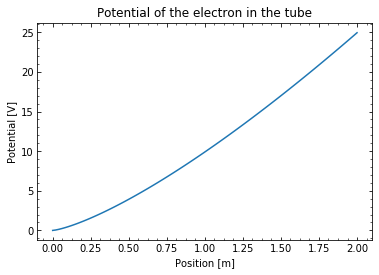

In [4]:
#let's plot what this looks like
i = te_current(4.5,1375)
x = np.linspace(0,2,100)
fig = plt.figure();
ax = fig.add_subplot(111);
ax.plot(x, potential(x,i));
ax.set_xlabel("Position [m]");
ax.set_ylabel("Potential [V]");
ax.set_title("Potential of the electron in the tube");

We expect for the electron to gain energy as it moves along the tube. The potential scales quite nicely and is consistent with expected results.

Next, we start encoding the collision processes. The first here is 'hit'. This takes the energy of the electron and atom it collided with, and calculates whether it would be an elastic or inelastic collision, and the energy of the electron afterwards. This will be helpful for later when we send an electron down the tube to see whether it will scatter elastically or inelastically, where there are separate functions to capture behavior for these different cases.

**new addition** It is also notable that we have some extra framework operating under the hood. In a previous phase of this project, we defined a .txt file with some useful properties of gases we plan to use in this project, which we can then port in from the .txt to use when we are modeling gas atoms. We use this for the first time in the 'hit' function, so look for it there.

In [5]:
def hit(pot,atom,T_tube):
    '''
    returns the energy of the electron after a collison, which will either be 
    the same for an elastic collison or minus the excitation energy of the atom
    inputs:
    pot - float, - the potential energy (aka the kinetic energy) of the electron (V)
    atom - arrray, boolean - array where the atoms that you want to use are True with the rest are False
        options are in the same order as 'atom_data.txt' (H,He,Ne,Ar,Kr,Xe,Hg) 
        ex np.array([True,False,False,False,False,False,True]) = hydrogen and mercury
    T_tube - float, kelvin
        temperature of the tube, NOT the same at T_cathode
    outputs:
    energy - array, floats - the energy after colliding with that atom (eV)
    '''
    atoms = np.genfromtxt('atom_data.txt',comments = '#',delimiter = ',')
    e = elastic = np.zeros(len(atoms[0]))
    energy = np.zeros(len(atoms[0]))
    for i in range(len(atom)):
        if (atom[i]==True):
            k=1.380649e-23
            m=atoms[4,i]
            sca=np.sqrt(k*T_tube/m)
            me=9.10938e-31
            v=np.sqrt(2*pot/me)
            KE=m*maxwell.rvs(scale=sca)**2/2*6.242e+18*np.sin(2*np.pi*np.random.rand())
            e[i]=KE+pot-atoms[0,i]
            if (e[i]>0):
                energy[i] = e[i]
                elastic[i] = False
            else:
                energy[i] = pot
                elastic[i] = True
        else:
            energy[i] = energy[i]
    return energy[atom]

In [6]:
def elastic(pot,atom,T_tube):
    '''
    performs the same operations as hit, but just returns whether the collision
    was elastic or not, to be used later in functions
    inputs:
    pot - float, - the potential energy (aka the kinetic energy) of the electron (V)
    atom - arrray, boolean - array where the atoms that you want to use are True with the rest are False
        options are in the same order as 'atom_data.txt' (H,He,Ne,Ar,Kr,Xe,Hg) 
        ex np.array([True,False,False,False,False,False,True]) = hydrogen and mercury
    T_tube - float, kelvin
        temperature of the tube, NOT the same at T_cathode
    outputs:
    elastic - array, boolean - a truth value for if the collision was elastic or not
    '''
    atoms = np.genfromtxt('atom_data.txt',comments = '#',delimiter = ',')
    e = elastic = np.zeros(len(atoms[0]))
    energy = np.zeros(len(atoms[0]))
    for i in range(len(atom)):
        if (atom[i]==True):
            k=1.380649e-23
            m=atoms[4,i]
            sca=np.sqrt(k*T_tube/m)
            me=9.10938e-31
            v=np.sqrt(2*pot/me)
            KE=m*maxwell.rvs(scale=sca)**2/2*6.242e+18*np.sin(2*np.pi*np.random.rand())
            e[i]=KE+pot-atoms[0,i]
            if (e[i]>0):
                energy[i] = e[i]
                elastic[i] = False
            else:
                energy[i] = pot
                elastic[i] = True
        else:
            energy[i] = energy[i]
    return elastic[atom]

In [7]:
atom = np.array([True,False,False,False,False,False,True])
hit(19,atom,300)

array([ 8.79959525, 14.07941457])

# Basic Implementation

Here we will start by considering the easiest implementation of this technique by considering elections traveling down a rectangle filled with atoms. These atoms are randomly distributed and are at absolute zero. Because of this, only the energy of the electron is important in the collisions and it can be easily calculated by the potential. The collisions are determined to occur when the electron position is determined to be close enough to another atom within a set tolerance. We then run our hit function to  determine whether the collision is elastic or not.

In [8]:
def dist(N,J,epos,E,atom,T,i=5e-5,full_out=False):
    """
    Takes in the number of particles in an slice and the number of particles
    in the slice as well as the electron position in the tube.
    Given this it calculates whether or not a collision occurs and if so 
    it determines whether or not the collision results in photon emission or not. 
    
    Parameters
    ----------
    N: float
        number of a given type of atom that is present within the tube
    J: float
        number of segments the tube is broken into (not totally necessary)
    epos: float
        normalized postion of electron in a given slice of the tube
    E: float
        Energy of the electron along the tube (in meters)
    atom: string
        name of the gaseous atom
    i: float (optional)
        current passing through the tube. default is 5e-5 A
    Outputs
    -------
    Prints whether or not a collision occus and if that collision occurs and
    whether or not it was inelastic
    """
    Enew=E
    dist=np.random.random(int (N/J))
    contact=np.isclose(epos,dist,atol=1e-8)
    if(np.any(contact)):
        if(full_out):
            print('collision')
        Enew = hit(E,atom,T)
    else:
        if(full_out):  
            print('miss!')
    return Enew

In [9]:
def hit_detection(N,J,atom,U,y,yf,T_tube):
    '''
    simulates an electron being in the jth slice of the tube, with an equal 
    fraction of gas atoms being in said slice and determines if their is a collision
    and gives the resulting energy
    inputs:
    N: array, float (but needs to be whole numbers)
        number of each gas atom in the tube
        NOTE: this array needs to be the same length as atom, so if youre not using that atom
        set that element =0
        NOTE: you can increase the number of atoms proportional to the number of slices, on a standard dell xps DONT let N/J>10^7ish
    J: int
        total number of segments of the tube
    atom: array, boolean
        same as 'hit', atoms in use set =True
    U: float
        energy of the electron at that slices' position
    y: float
        position along y axis of tube, (0,y_f) exclusive
        if this is the start, should choose this using RNG
    yf: float 
        width of the tube in the y-direction
    i: float
        thermionic current 
    T: float
        temperature of the tube, NOT the same at T in 'te_current'
    outputs: returns a tuple 
    (E,Eloss): float,tuple
        E - energy of electron after being in slice
        Eloss - is the value of the energy that the atom lost from the collision
    (col,elastic) = boolean, tuple
        col is if there was a collision 
        elastic is True if there was an elastic collision
    '''
    atoms = np.genfromtxt('atom_data.txt',comments = '#',delimiter = ',')
    # resizing all the arrays and calculating needed quantities
    radii = atoms[3,atom]
    ex_e = atoms[0,atom]
    a = N[atom]/J
    a = a.astype(int,copy=False)
    ga_pos = np.zeros((len(N[atom]),np.max(a)))
    # loops makes it so it only needs to do RNG the appropiate number of times
    for i in range(len(a)):
        ga_pos[i,:a[i]] = yf*np.random.random(a[i])
    # handles having multiple gas atoms in the tube as it randomly choses which gas atom it checks for first
    q = np.arange(0,len(N[atom]),1);np.random.shuffle(q)
    for i in range(len(q)):
        contact = np.isclose(y,ga_pos[q[i],:a[i]],atol=radii[q[i]]) #the absolute tol is the atomic radius of that atom
        if (np.any(contact)):
            E = hit(U,atom,T_tube)[q[i]]
            iselastic = elastic(U,atom,T_tube)[q[i]]
            col = True
            if (iselastic==False):
                Eloss = ex_e[q[i]]
            else:
                Eloss = 0
            break
        else:
            E = U
            col = False
            iselastic = False
            Eloss=0
    del ga_pos
    return ((E,Eloss),(col,iselastic))

# Testing: Neon Gas in a T = 0 Tube
We can test our implementation here with one gas in a tube which is at T = 0, which is a relatively simple case.

In [10]:
i=te_current(4,1250)
Eloss=0
N = np.array([0,0,5000000,0,0,0,0]) #Number of particles
atom = np.array([False,False,True,False,False,False,False])
J=50 #Number of segments the zone is broken into
yf = 2
T_tube = 0
y = yf*np.random.random()
#Setting temperature to absolute zero
data=np.zeros(50)
for x in range(50):
    E = potential(x/10,i)
    E=E-Eloss
    data[x]=E
    col_e,scatt = hit_detection(N,J,atom,E,y,yf,T_tube)
    if (scatt[1]==False):
        Eloss += col_e[1]


The data shown here shows us what it would be like if we had 5,000,000 atoms inside our rectangle and it was broken into 50 segments spaced .1 meters apart.
We can clearly see that some collisions are occuring and that these collisions do occasionally result in the emission of a photon. Below we graph the energy of the electron as it travels through the tube as a function of position along the tube

114.0


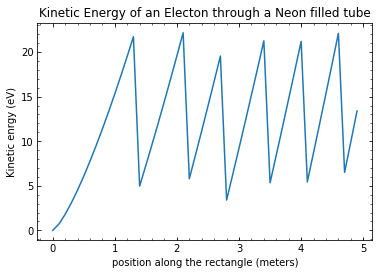

In [11]:
ind=np.arange(50)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(ind/10,data)
ax.set_title('Kinetic Energy of an Electon through a Neon filled tube')
ax.set_ylabel('Kinetic enrgy (eV)')
ax.set_xlabel('position along the rectangle (meters)')
print(Eloss)

Now that we know that our model shows the correct behavior we can create a simple visualization shown below for a Neon filled tube. The vertical lines represent bands where a photon was emitted. The darker the band the more photons we emitted in that band. 

In [12]:
def tube_run(N_electron,N_atom,x,yf,i,T_tube):
    '''
    this function runs our monte carlo spawned electron 
    through the tube using 'hit detection' at each slice
    and returns DATA
        as of right now im thinking like some sort of positional historgram data 
        that are vectors with the same length as the number of 
        slices and counts for elastic,inelastic, and maybe something 
        else so we can analyze it afterwards, 
        cuz the graphs in the phase2 doc are really good, but we are gonna 
        want raw data for when we are just running this a lot of times
    inputs:
    N_elec: int
        number of electrons you want to run through the tube
    N_atom: array, float (but needs to be whole numbers)
        number of each gas atom in the tube
    x: array, float
        positions you wish to evaluate in the form of an array
    yf: float 
        width of the tube in the y-direction
    i: float, eV
        work function of the emitting metal
    T_tube: float, K
        temperature of the gas molecules in the tube
    outputs:
    data: 2D array
        positions and energies of each electron run
    hit_freq, array
        how many times a collision happened in a given slice
    '''
    data = np.zeros((len(x),N_electron))
    hit_freq = np.zeros((len(x),len(atoms[0][atom])))
    for e in range(N_electron):
        Eloss = 0.
        yi = yf*np.random.random()
        for l in range(len(x)):
            E = potential(x[l],i)
            E -= Eloss
            data[l,e] = E
            (col_e,scatt) = hit_detection(N_atom,len(x),atom,E,y,yf,T_tube)
            if(scatt[1]==False):
                Eloss += col_e[1]
                ind = np.isclose(col_e[1],atoms[0][atom])
                hit_freq[l,ind] += 1 
    return data,hit_freq

In [13]:
atom = np.array([False,False,True,False,False,False,False])
N_atom = np.array([0,0,1e6,0,0,0,0])
x = np.linspace(0,5,101)
N_electron = 50
yf = 2.
T_tube = 0
i = te_current(4.5,1370)
data,hit_freq = tube_run(N_electron,N_atom,x,yf,i,T_tube)

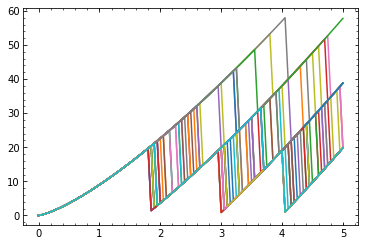

In [14]:

plt.plot(x,data);
#print(hit_freq)


Text(0.5,0,'Position along the tube')

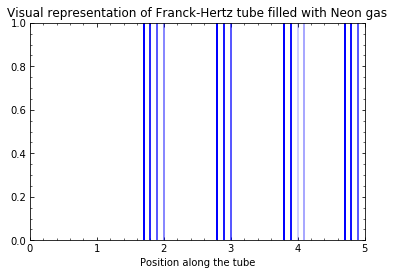

In [15]:
i=te_current(4.5,1375)
NeN=5000000 #Number of Neon atoms
J=50 #Number of segments the zone is broken into
epos=.5 # electron postion along the slice
T_tube = 0
Nedata=np.zeros(50)
fig=plt.figure()
ax=fig.add_subplot(111)
for y in range(50):
    Eloss=0
    for x in range(50):
        E = potential(x/10, i)
        E=E-Eloss
        ENe = dist(NeN,J,epos,E,atom,T_tube)
        if(E!=ENe):
            Eloss=Eloss-ENe+E
            Nedata[x]=Nedata[x]+1
            ax.axvline(x/10,alpha=.25,color='blue')
ax.set_xlim([0,5])
ax.set_title('Visual representation of Franck-Hertz tube filled with Neon gas')
ax.set_xlabel('Position along the tube')

Text(0.5,0,'Position along the tube')

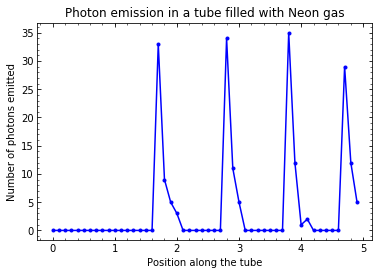

In [16]:
fig=plt.figure()
ax=fig.add_subplot(111)
ind=np.arange(50)
ax.plot(ind/10,Nedata,'b.-')
ax.set_title('Photon emission in a tube filled with Neon gas')
ax.set_ylabel('Number of photons emitted')
ax.set_xlabel('Position along the tube')

# Two gases
This time we perform a run with two gases, each of which have different concentrations.

In [17]:
atom = np.array([False,False,True,False,True,False,False])
N_atom = np.array([0,0,1e6,0,1e4,0,0])
x = np.linspace(0,5,101)
N_electron = 50
yf = 2.
T_tube = 0
i = te_current(4.5,1370)
r2data,r2hit_freq = tube_run(N_electron,N_atom,x,yf,i,T_tube)

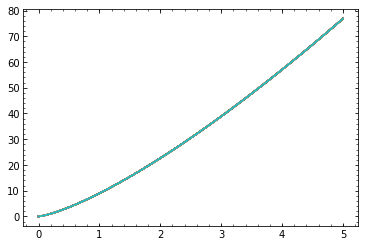

In [18]:
plt.plot(x,r2data);


Here is a more numerical version of the above plot. It shows the frequency of photon emissions along the tube from the incoming electrons.

# Two Gases
Now we are going to increase the complexity of our system by adding another gas to our tube.

Text(0.5,0,'Position along the tube')

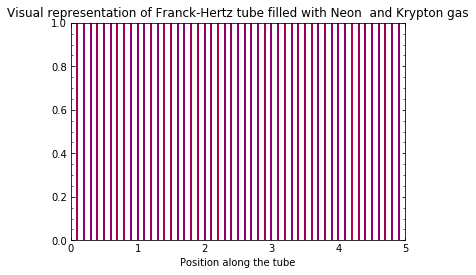

In [19]:
i = te_current(4,1350)
NeN=5000000 #Number of Neon atoms
KrN=2000000 #Number of Krypton atoms
J=50 #Number of segments the zone is broken into
epos=.5 # electron postion along the slice
Kratom = np.array([False,False,False,False,True,False,False])
Neatom = np.array([False,False,True,False,False,False,False])
Nedata=np.zeros(50)
Krdata=np.zeros(50)
fig=plt.figure()
ax=fig.add_subplot(111)
for y in range(50):
    Eloss=0
    for x in range(50):
        E = potential(x/10,1375)
        E=E-Eloss
        EKr = dist(KrN,J,epos,E,Kratom,T=0)
        ENe = dist(NeN,J,epos,E,Neatom,T = 0)
        if(E!=ENe):
            Eloss=Eloss-ENe+E
            E=ENe
            Nedata[x]=Nedata[x]+1
            ax.axvline(x/10,alpha=.25,color='blue')
        if(E!=EKr):
            Eloss=Eloss-EKr+E
            E=EKr
            Krdata[x]=Krdata[x]+1
            ax.axvline(x/10,alpha=.25,color='red')
ax.set_xlim([0,5])
ax.set_title('Visual representation of Franck-Hertz tube filled with Neon  and Krypton gas')
ax.set_xlabel('Position along the tube')

From this we can clearly see that the tube gets much more complicated much more quickly. The bands of Krypton are overlapping creating a mix of colors and the seperate bands of energy are no longer distinguishable. In order to get a better understanding of the system we plotted the emissions from the Neon and Krypton gas seperately.

Text(0.5,0,'Position along the tube')

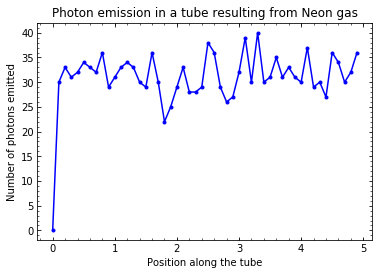

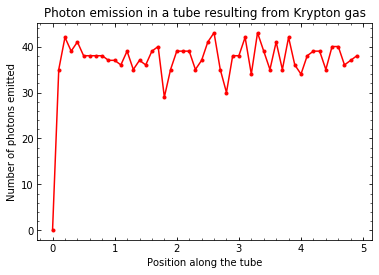

In [20]:
fig=plt.figure()
ax=fig.add_subplot(111)
ind=np.arange(50)
ax.plot(ind/10,Nedata,'b.-')
ax.set_title('Photon emission in a tube resulting from Neon gas')
ax.set_ylabel('Number of photons emitted')
ax.set_xlabel('Position along the tube')
fig=plt.figure()
ax=fig.add_subplot(111)
ind=np.arange(50)
ax.plot(ind/10,Krdata,'r.-')
ax.set_title('Photon emission in a tube resulting from Krypton gas')
ax.set_ylabel('Number of photons emitted')
ax.set_xlabel('Position along the tube')

By seperating the emissions from the two gases we are able to see the emitting bands much more clearly. From this we can see that the results are generally what we expect. Because Krypton can have lower enegy emissions it is responsible for the majority of photon emissions. However, the Neon peaks are much more pronounced because there are a larger number of Neon atoms in the tube increasing the chance of an inelastic collision once the electron has sufficient energy. 

# Adding in Temperature
Luckily, a Maxwell-Boltzmann distribution function already exists in Python and can be used to extract random values under that distribution. We will use this distribution to model Neon gas atoms again and try to observe any differences from when the tube was at T = 0. 

In [21]:
#same cell as above but this time the temperature of the tube is nonzero
i=5e-5
Eloss=0
N=5000000 #Number of particles
atom = np.array([False,False,True,False,False,False,False])
J=50 #Number of segments the zone is broken into
epos=.5 # electron postion along the slice
T=4000 #Setting temperature to T = 4000
data=np.zeros(50)
for x in range(50):
    E = potential(x/10,i)
    E=E-Eloss
    data[x]=E
    Enew = dist(N,J,epos,E,atom,T)
    Eloss=Eloss-Enew+E

[57.85916831]


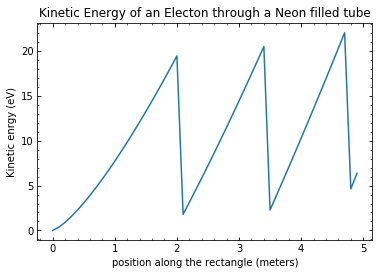

In [22]:
ind=np.arange(50)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(ind/10,data)
ax.set_title('Kinetic Energy of an Electon through a Neon filled tube')
ax.set_ylabel('Kinetic enrgy (eV)')
ax.set_xlabel('position along the rectangle (meters)')
print(Eloss)

Looking at this graph now we can see that the energy of these collisions varies much more and photon emission can now occur in regions where it would be impossible based on potential alone. 

## Two Gases With Nonzero Temperature 

Text(0.5,0,'Position along the tube')

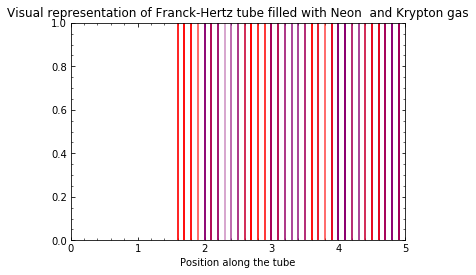

In [23]:
i=5e-5
NeN=5000000 #Number of Neon atoms
KrN=2000000 #Number of Krypton atoms
J=50 #Number of segments the zone is broken into
epos=.5 # electron postion along the slice
Kratom = np.array([False,False,False,False,True,False,False])
Nedata=np.zeros(50)
Krdata=np.zeros(50)
fig=plt.figure()
ax=fig.add_subplot(111)
for y in range(50):
    Eloss=0
    for x in range(50):
        E = potential(x/10,i)
        E=E-Eloss
        EKr = dist(KrN,J,epos,E,Kratom,T)
        ENe = dist(NeN,J,epos,E,atom,T)
        if(E!=ENe):
            Eloss=Eloss-ENe+E
            E=ENe
            Nedata[x]=Nedata[x]+1
            ax.axvline(x/10,alpha=.25,color='blue')
        if(E!=EKr):
            Eloss=Eloss-EKr+E
            E=EKr
            Krdata[x]=Krdata[x]+1
            ax.axvline(x/10,alpha=.25,color='red')
ax.set_xlim([0,5])
ax.set_title('Visual representation of Franck-Hertz tube filled with Neon  and Krypton gas')
ax.set_xlabel('Position along the tube')

Text(0.5,0,'Position along the tube')

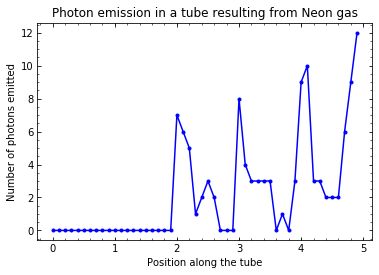

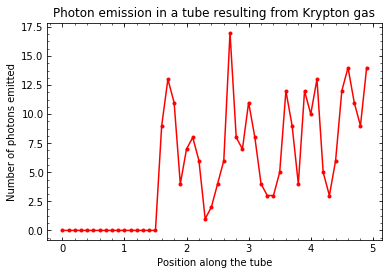

In [24]:
fig=plt.figure()
ax=fig.add_subplot(111)
ind=np.arange(50)
ax.plot(ind/10,Nedata,'b.-')
ax.set_title('Photon emission in a tube resulting from Neon gas')
ax.set_ylabel('Number of photons emitted')
ax.set_xlabel('Position along the tube')
fig=plt.figure()
ax=fig.add_subplot(111)
ind=np.arange(50)
ax.plot(ind/10,Krdata,'r.-')
ax.set_title('Photon emission in a tube resulting from Krypton gas')
ax.set_ylabel('Number of photons emitted')
ax.set_xlabel('Position along the tube')